In [1]:
import pandas as pd
from pySankey.sankey import sankey
from protrend.report.general import entities

In [19]:
relationships = []

for node in entities.values():
    source = node.node_name()
    for relationship in node.node_relationships().values():
        if 'node_class' not in relationship.definition:
            # noinspection PyProtectedMember
            relationship._lookup_node_class()

        target = relationship.definition['node_class'].node_name()

        connection = (source, target)

        relationships.append(connection)

relationships

[('effector', 'source'),
 ('effector', 'regulator'),
 ('effector', 'regulatoryinteraction'),
 ('evidence', 'regulator'),
 ('evidence', 'operon'),
 ('evidence', 'gene'),
 ('evidence', 'tfbs'),
 ('evidence', 'regulatoryinteraction'),
 ('gene', 'source'),
 ('gene', 'evidence'),
 ('gene', 'publication'),
 ('gene', 'pathway'),
 ('gene', 'operon'),
 ('gene', 'organism'),
 ('gene', 'regulator'),
 ('gene', 'tfbs'),
 ('gene', 'regulatoryinteraction'),
 ('gene', 'promoterregion'),
 ('motif', 'source'),
 ('motif', 'organism'),
 ('motif', 'tfbs'),
 ('motif', 'regulator'),
 ('operon', 'source'),
 ('operon', 'evidence'),
 ('operon', 'publication'),
 ('operon', 'organism'),
 ('operon', 'gene'),
 ('organism', 'source'),
 ('organism', 'operon'),
 ('organism', 'regulator'),
 ('organism', 'gene'),
 ('organism', 'tfbs'),
 ('organism', 'regulatoryinteraction'),
 ('organism', 'motif'),
 ('organism', 'promoterregion'),
 ('pathway', 'source'),
 ('pathway', 'regulator'),
 ('pathway', 'gene'),
 ('regulator', 's

In [20]:
df = pd.DataFrame(relationships, columns=['source', 'target'])
df

,source,target
0,effector,source
1,effector,regulator
2,effector,regulatoryinteraction
3,evidence,regulator
4,evidence,operon
...,...,...
74,tfbs,organism
75,tfbs,regulator
76,tfbs,gene
77,tfbs,regulatoryinteraction


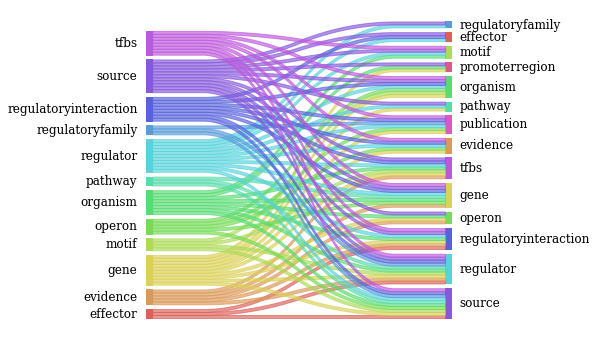

In [21]:
sankey(df["source"], df["target"], fontsize=12)

In [22]:
nodes = [{'name': node.node_name(), 'id': node.node_name()} for node in entities.values()]
edges = [{'source': rel[0], 'target': rel[1], 'value': 1} for rel in relationships]
net = {'nodes': nodes, 'links': edges}
net

{'nodes': [{'name': 'effector', 'id': 'effector'},
  {'name': 'evidence', 'id': 'evidence'},
  {'name': 'gene', 'id': 'gene'},
  {'name': 'motif', 'id': 'motif'},
  {'name': 'operon', 'id': 'operon'},
  {'name': 'organism', 'id': 'organism'},
  {'name': 'pathway', 'id': 'pathway'},
  {'name': 'regulator', 'id': 'regulator'},
  {'name': 'regulatoryfamily', 'id': 'regulatoryfamily'},
  {'name': 'regulatoryinteraction', 'id': 'regulatoryinteraction'},
  {'name': 'source', 'id': 'source'},
  {'name': 'tfbs', 'id': 'tfbs'}],
 'links': [{'source': 'effector', 'target': 'source', 'value': 1},
  {'source': 'effector', 'target': 'regulator', 'value': 1},
  {'source': 'effector', 'target': 'regulatoryinteraction', 'value': 1},
  {'source': 'evidence', 'target': 'regulator', 'value': 1},
  {'source': 'evidence', 'target': 'operon', 'value': 1},
  {'source': 'evidence', 'target': 'gene', 'value': 1},
  {'source': 'evidence', 'target': 'tfbs', 'value': 1},
  {'source': 'evidence', 'target': 'regula

In [23]:
import json
with open('data.json', 'w') as fp:
    json.dump(net, fp)
